/home/corgipooz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/corgipooz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:78: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


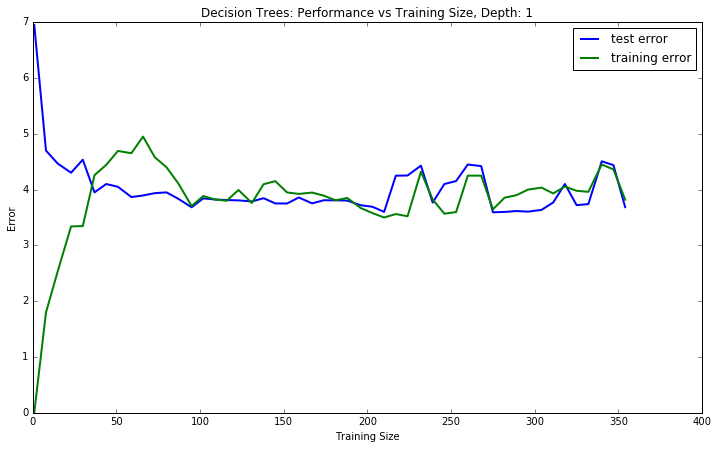

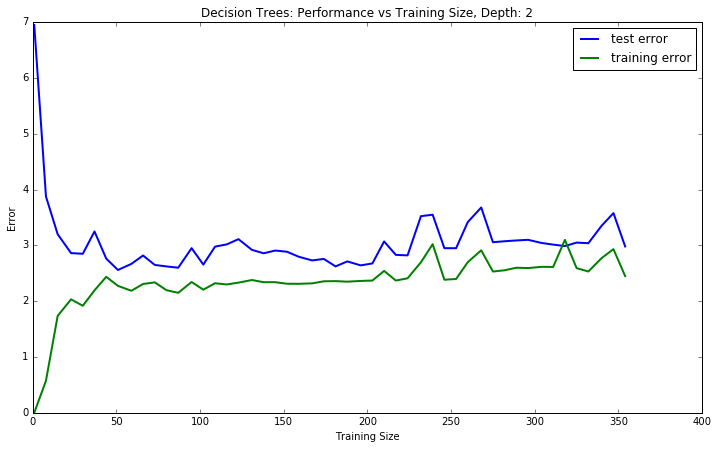

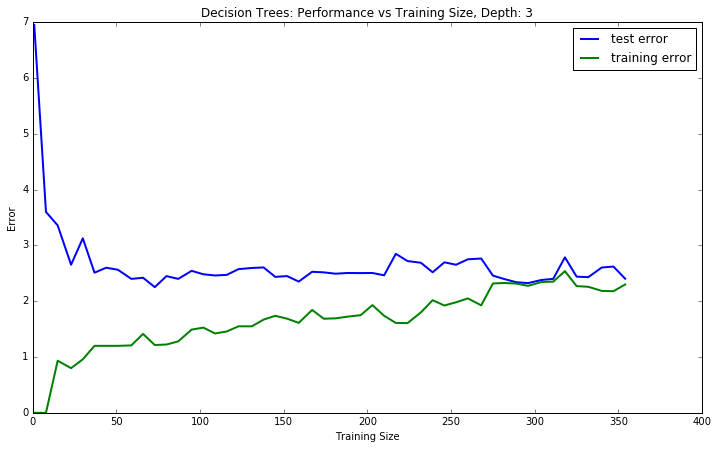

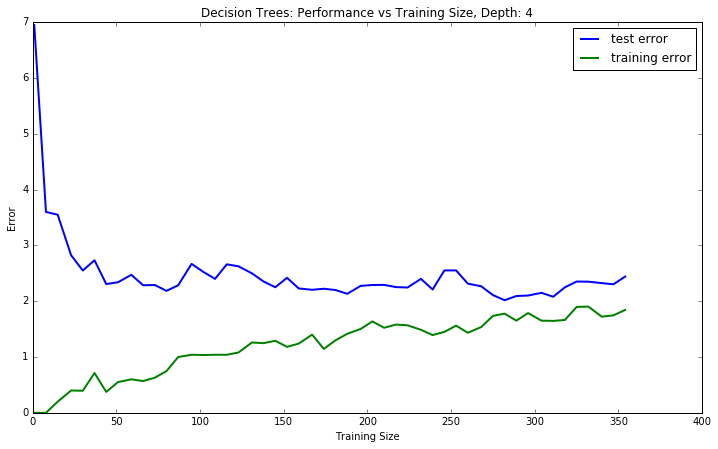

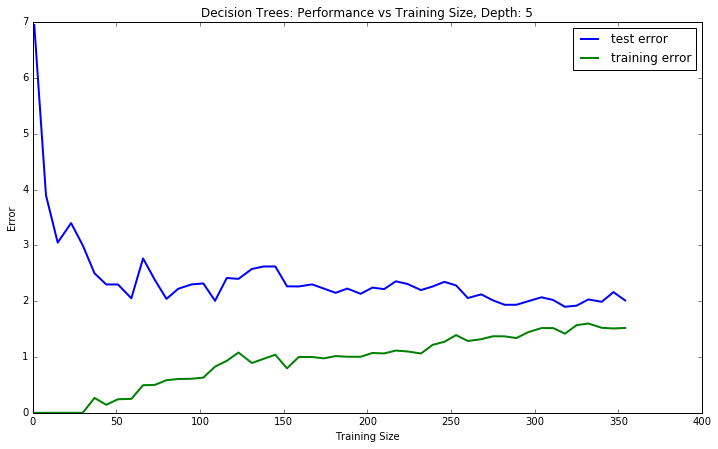

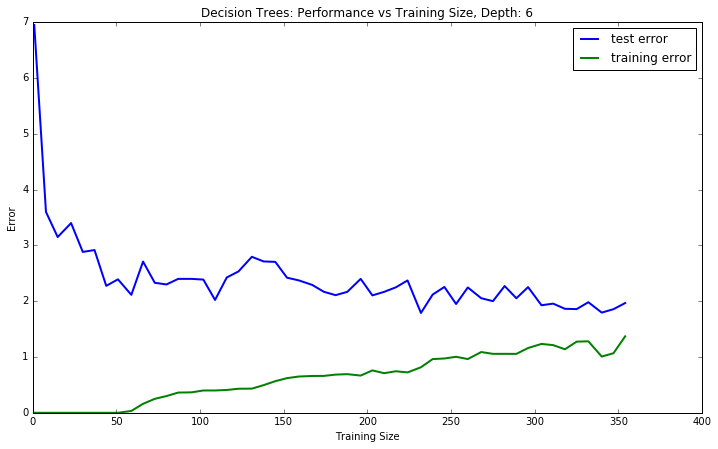

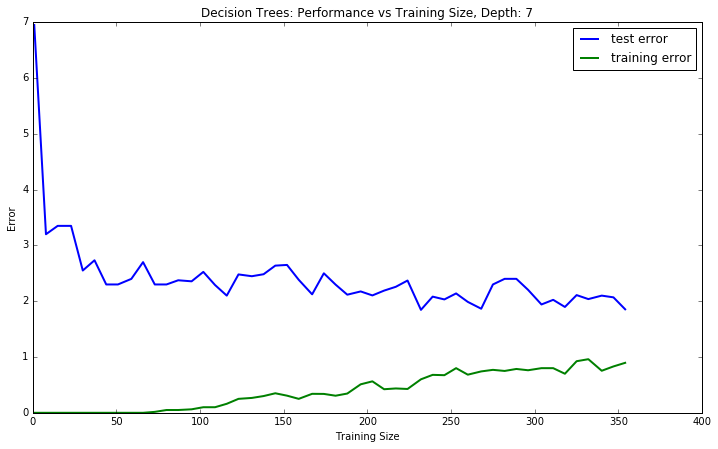

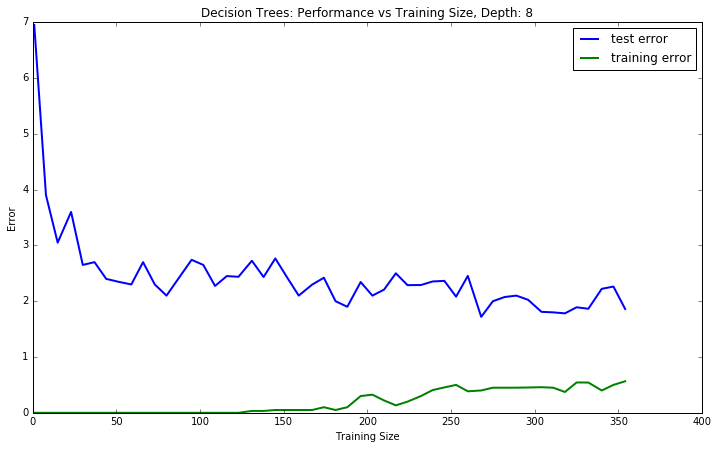

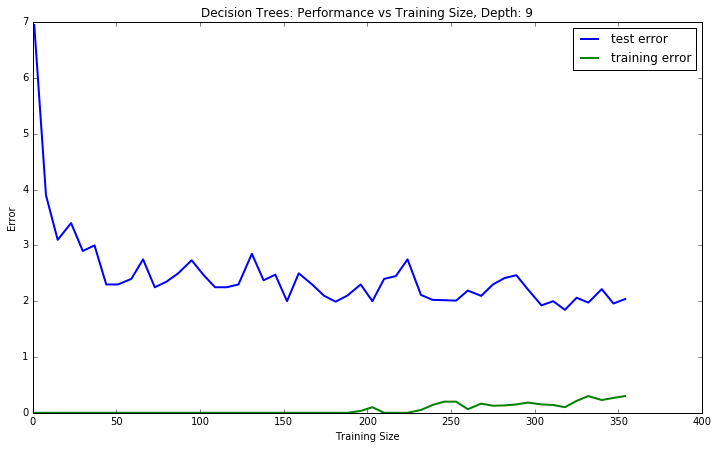

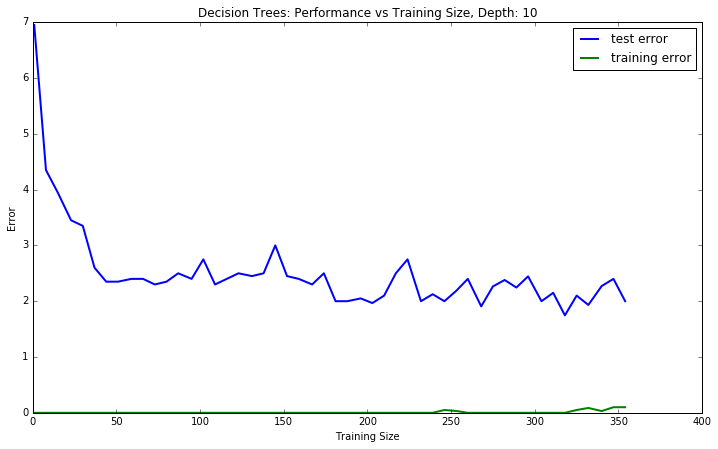

Model Complexity: 


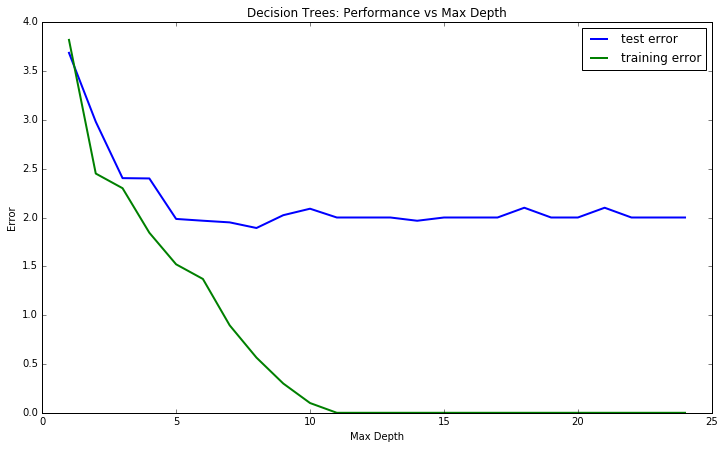

In [7]:
"""Load the Boston dataset and examine its target (label) distribution."""

# Load libraries
%matplotlib inline
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn import grid_search
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,7)

def load_data():
    """Load the Boston dataset."""

    boston = datasets.load_boston()
    return boston


def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data
    
    # Calculate features per project requirements
    print 'Size of data (number of houses): ' + str(len(housing_prices))
    print 'Number of features: ' + str(housing_features.shape[1])
    
    # Note: Median value of owner-occupied homes in $1000's. See
    # https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
    print 'Minimum price: $' + str(np.min(housing_prices)) + 'K'
    print 'Maximum price: $' + str(np.max(housing_prices)) + 'K'
    print 'Mean price: $' + str(round(np.mean(housing_prices),1)) + 'K'
    print 'Median price: $' + str(round(np.median(housing_prices),1)) + 'K'
    print 'Standard deviation: $' + str(round(np.std(housing_prices),2)) + 'K'


def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target
        
    # Split the data into training and test sets (70-30 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    return X_train, y_train, X_test, y_test


def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""
    
    return median_absolute_error(label, prediction)


def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    #print "Decision Tree with Max Depth: "
    #print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err, depth)


def learning_curve_graph(sizes, train_err, test_err, depth):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size, Depth: ' + str(depth))
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()


def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)


def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.show()


def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
        
    reg = grid_search.GridSearchCV(regressor, parameters, scoring='median_absolute_error')

    # Fit the learner to the training data to obtain the best parameter set
    print "Final Model: "
    print reg.fit(X, y)
    
    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict(x)
    print "House: " + str(x)
    print "Prediction: " + str(y)
    print reg.best_params_

def main():
    """Analyze the Boston housing data. Evaluate and validate the
    performanance of a Decision Tree regressor on the housing data.
    Fine tune the model to make prediction on unseen data."""

    # Load data
    city_data = load_data()

    # Explore the data
    #explore_city_data(city_data)

    # Training/Test dataset split
    X_train, y_train, X_test, y_test = split_data(city_data)

    # Learning Curve Graphs
    max_depths = [1,2,3,4,5,6,7,8,9,10]
    for max_depth in max_depths:
        learning_curve(max_depth, X_train, y_train, X_test, y_test)

    # Model Complexity Graph
    model_complexity(X_train, y_train, X_test, y_test)

    # Tune and predict Model
    #fit_predict_model(city_data)


#if __name__ == "__main__":
#    main()

main()